In [1]:
%reset

import numpy as np
from astropy import units
import pdb
import matplotlib.pyplot as pl

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Code below will generate tables for Problem 1

In [2]:
def get_n(lam, P, T): 
    #lambda in microns
    #P in mm Hg
    #T in K
    P_0 = 760
    T_0 = 288
    n_as = 1.+(5.79210e-2/(238.0185-(lam)**(-2.))) + (1.67917e-3/(57.362-(lam)**(-2.)))
    n = 1.+(P/P_0)*(T_0/T)*(n_as-1.)
    return n

def get_R(airmass, lam, P, T, H_0, R_0):
    theta = np.arccos(1./airmass)
    n = get_n(lam, P, T)
    R = (n-1.)*(1.-H_0/R_0)*np.tan(theta) - (n-1.)*(H_0/R_0 - (n-1.)/2.)*np.tan(theta)**3.
    
    return R

In [3]:
#Conditions at Mauna kea
P = 460
T = 273
H_0 = 7.991
R_0 = 6378+13. #will make a negligible difference

filters = {
    'B':[0.394,0.496],
    'R':[0.579,0.737],
    'J':[1.113,1.326],
    'K':[1.995,2.385]
}

airmass_list = [1., 1.2, 1.4, 1.6, 1.8, 2.0]

In [4]:
# Table for 1a

extension_table = np.zeros((len(airmass_list), len(filters.keys())))

for ai, airmass in enumerate(airmass_list):
    for fi, filter_name in enumerate(filters.keys()):
        lam_range = filters[filter_name]
        R1 = get_R(airmass, lam_range[0], P, T, H_0, R_0)
        R2 = get_R(airmass, lam_range[1], P, T, H_0, R_0)        
        extension = (R1-R2)*3600.*180./np.pi #arcsec
        extension_table[ai,fi] = extension

#Make latex formulated table
print(" Airmass & B & R & J & K \\")
for ai in range(0, len(airmass_list)):
    print("{0:.1f} & {1:.2f}'' & {2:.2f}'' & {3:.2f}'' & {4:.2f}'' \ ".format(airmass_list[ai], extension_table[ai,0],extension_table[ai,1],extension_table[ai,2],extension_table[ai,3]))
          

 Airmass & B & R & J & K \
1.0 & 0.00'' & 0.00'' & 0.00'' & 0.00'' \ 
1.2 & 0.35'' & 0.16'' & 0.03'' & 0.01'' \ 
1.4 & 0.52'' & 0.24'' & 0.05'' & 0.01'' \ 
1.6 & 0.66'' & 0.30'' & 0.06'' & 0.02'' \ 
1.8 & 0.79'' & 0.36'' & 0.07'' & 0.02'' \ 
2.0 & 0.91'' & 0.41'' & 0.08'' & 0.03'' \ 


In [5]:
# Table for 1b
tab1 = np.zeros((len(airmass_list), len(filters.keys())))

for ai, airmass in enumerate(airmass_list):
    for fi, filter_name in enumerate(filters.keys()):
        z = np.arccos(1./airmass)
        theta_seeing = 0.6*((np.mean(filters[filter_name])/np.mean(filters['R']))**(-0.2))*np.cos(z)**(-3./5.)
        if (extension_table[ai,fi] > 0.5*theta_seeing):
            tab1[ai,fi] = 1
            
#Make latex formulated table
print(" Airmass & B & R & J & K \\")
for ai in range(0, len(airmass_list)):
    print("{0:.1f} & {1:d} & {2:d} & {3:d} & {4:d} \ ".format(airmass_list[ai], int(tab1[ai,0]),\
                                                                                        int(tab1[ai,1]),\
                                                                                        int(tab1[ai,2]),\
                                                                                        int(tab1[ai,3])))
            

 Airmass & B & R & J & K \
1.0 & 0 & 0 & 0 & 0 \ 
1.2 & 0 & 0 & 0 & 0 \ 
1.4 & 1 & 0 & 0 & 0 \ 
1.6 & 1 & 0 & 0 & 0 \ 
1.8 & 1 & 0 & 0 & 0 \ 
2.0 & 1 & 0 & 0 & 0 \ 


In [6]:
# Table for 1c
tab2 = np.zeros((len(airmass_list), len(filters.keys())))

for ai, airmass in enumerate(airmass_list):
    for fi, filter_name in enumerate(filters.keys()):
        z = np.arccos(1./airmass)
        theta_diffraction = (1.0e-6*np.mean(filters[filter_name])/10.)*3600.*180./np.pi
        if (extension_table[ai,fi] > 0.5*theta_diffraction):
            tab2[ai,fi] = 1
            
#Make latex formulated table
print(" Airmass & B & R & J & K \\")
for ai in range(0, len(airmass_list)):
    print("{0:.1f} & {1:d} & {2:d} & {3:d} & {4:d} \ ".format(airmass_list[ai], int(tab2[ai,0]),\
                                                                                        int(tab2[ai,1]),\
                                                                                        int(tab2[ai,2]),\
                                                                                        int(tab2[ai,3])))
            

 Airmass & B & R & J & K \
1.0 & 0 & 0 & 0 & 0 \ 
1.2 & 1 & 1 & 1 & 0 \ 
1.4 & 1 & 1 & 1 & 0 \ 
1.6 & 1 & 1 & 1 & 0 \ 
1.8 & 1 & 1 & 1 & 1 \ 
2.0 & 1 & 1 & 1 & 1 \ 


## Code below will generate tables for Problem 2

In [7]:
lam_min = 0.1e-6*units.m #microns
lam_max = 1000.e-6*units.m
num_lam = 1000
lam = np.exp(np.linspace(np.log(lam_min.value), np.log(lam_max.value), num = num_lam))*lam_min.unit

In [8]:
def get_fwhm_diffraction(lam, diameter):
    # FWHM of airy function
    fwhm_diffraction = 1.03*(lam/diameter).to('') #radians
    return fwhm_diffraction*3600.*180/np.pi #arcsec

def get_fwhm_seeing(lam, z):
    lam_0 = 0.5e-6*units.m
    r_0 = 30.*units.cm*((lam/lam_0)**(6./5.))*np.cos(z)**(3./5.)
    fwhm_seeing = 0.975*(lam/r_0).to('') #radians
    return fwhm_seeing*3600.*180/np.pi #arcsec

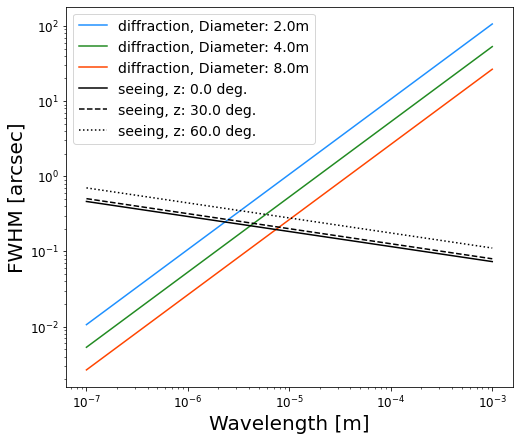

In [9]:
fig, ax = pl.subplots(1,1, figsize = (8,7))
zz = 0.0
diameter_list = [2.*units.m, 4.*units.m, 8.*units.m]
z_list = np.array([0., 30., 60.])*np.pi/180.
color_list = ['dodgerblue','forestgreen','orangered']
ls_list = ['solid','dashed','dotted']
for ii, di in enumerate(diameter_list):
    ax.plot(lam, get_fwhm_diffraction(lam, di), color = color_list[ii], ls = 'solid', label = 'diffraction, Diameter: {}m'.format(di.value))
for ii, zi in enumerate(z_list):    
    ax.plot(lam, get_fwhm_seeing(lam, zi), color = 'black', ls = ls_list[ii], \
            label = r'seeing, z: {} deg.'.format(np.round(z_list[ii]*180./np.pi)))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavelength [m]', fontsize = 20)
ax.set_ylabel('FWHM [arcsec]', fontsize = 20)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

ax.legend(fontsize = 14)
fig.savefig('resolution.png')
